In [3]:
import requests
from bs4 import BeautifulSoup

response = requests.get("https://pythondojang.bitbucket.io/weather/observation/currentweather.html")
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("table", {"class": "table_develop3"})

data = []
for tr in table.find_all("tr"):
    tds = list(tr.find_all("td"))

    for td in tds:
        if td.find("a"):
            point = td.find("a").text
            temperature = tds[5].text
            humidity = tds[9].text
            data.append([point, temperature, humidity])

data

[['서울', '25.6', '30'],
 ['백령도', '18.4', '62'],
 ['인천', '20.8', '54'],
 ['수원', '25.0', '41'],
 ['동두천', '24.9', '34'],
 ['파주', '25.1', '39'],
 ['강화', '20.0', '56'],
 ['양평', '25.5', '32'],
 ['이천', '25.6', '28'],
 ['북춘천', '24.6', '36'],
 ['북강릉', '19.9', '56'],
 ['울릉도', '16.8', '77'],
 ['속초', '19.1', '75'],
 ['철원', '23.9', '37'],
 ['대관령', '17.9', '49'],
 ['춘천', '25.7', '39'],
 ['강릉', '22.7', '41'],
 ['동해', '19.5', '77'],
 ['원주', '23.4', '36'],
 ['영월', '24.2', '34'],
 ['인제', '24.3', '31'],
 ['홍천', '25.4', '25'],
 ['태백', '19.6', '43'],
 ['정선군', '23.0', '32'],
 ['서산', '23.6', '49'],
 ['청주', '24.3', '33'],
 ['대전', '25.1', '37'],
 ['충주', '24.4', '32'],
 ['추풍령', '23.0', '35'],
 ['홍성(예)', '24.3', '46'],
 ['제천', '24.2', '32'],
 ['보은', '23.7', '28'],
 ['천안', '23.5', '35'],
 ['보령', '21.4', '56'],
 ['부여', '23.9', '37'],
 ['금산', '23.7', '30'],
 ['전주', '24.9', '44'],
 ['광주', '24.0', '35'],
 ['목포', '22.8', '51'],
 ['여수', '22.8', '49'],
 ['흑산도', '19.2', '93'],
 ['군산', '21.8', '55'],
 ['완도', '23.2', '45'],

In [13]:
with open("weather.csv", "w", encoding="utf-8") as file:
    file.write("point,temperature,humidify\n")
    for i in data:
        file.write("{0},{1},{2}\n".format(i[0], i[1], i[2]))

In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("weather.csv", index_col="point")

In [17]:
df

,temperature,humidify
point,,
서울,25.6,30
백령도,18.4,62
인천,20.8,54
수원,25.0,41
동두천,24.9,34
...,...,...
합천,25.1,32
밀양,24.7,34
산청,24.8,41


In [18]:
city_df = df.loc[['서울', '인천', '대전', '대구', '광주', '부산', '울산']]

In [19]:
city_df

,temperature,humidify
point,,
서울,25.6,30
인천,20.8,54
대전,25.1,37
대구,25.7,31
광주,24.0,35
부산,20.2,66
울산,19.7,70


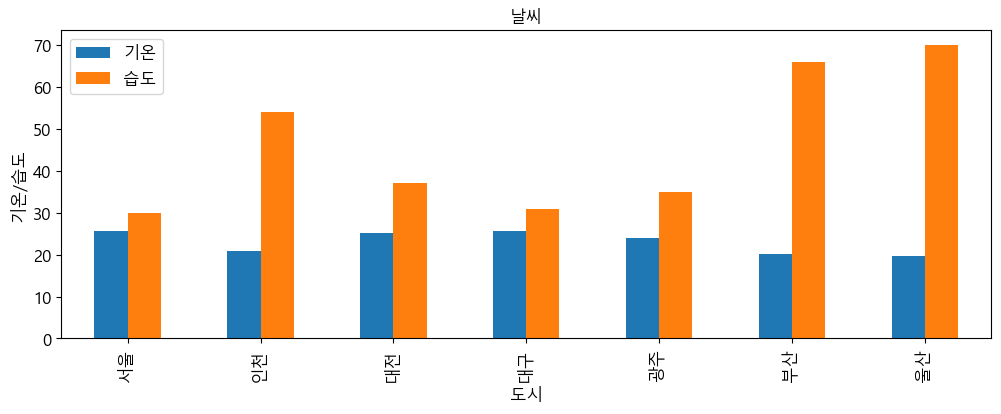

In [21]:
# 한글 폰트 설정
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

ax = city_df.plot(kind='bar', title='날씨', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('도시', fontsize=12)
ax.set_ylabel('기온/습도', fontsize=12)
ax.legend(['기온', '습도'], fontsize=12)